In [2]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go
import plotly.express as px

### library 설명 

* Matplotlib은 mpl_tookits라는 모듈로 3차원 그래프를 그릴 수 있다.

In [4]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 데이터 설명 

* Age : 나이
* Sex : 성별 
* bmi : 신장과 비교했을 때 몸무게 지수 
* Children : 보험으로 커버되는 아이들의 수
* Smoker : 흡연유무
* Region : 미국에서 수혜자의 지역 ( 동 서 남 북 )
* Charges : 개인 의료 비용

### 미션 

* 보험 비용을 정확하게 예측할 수 있습니까? 

### Work plan

* 데이터 분석
* 머신러닝 모델 만들기 

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum() / len(df) * 100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
df.describe().round(2)

## Data Visualization

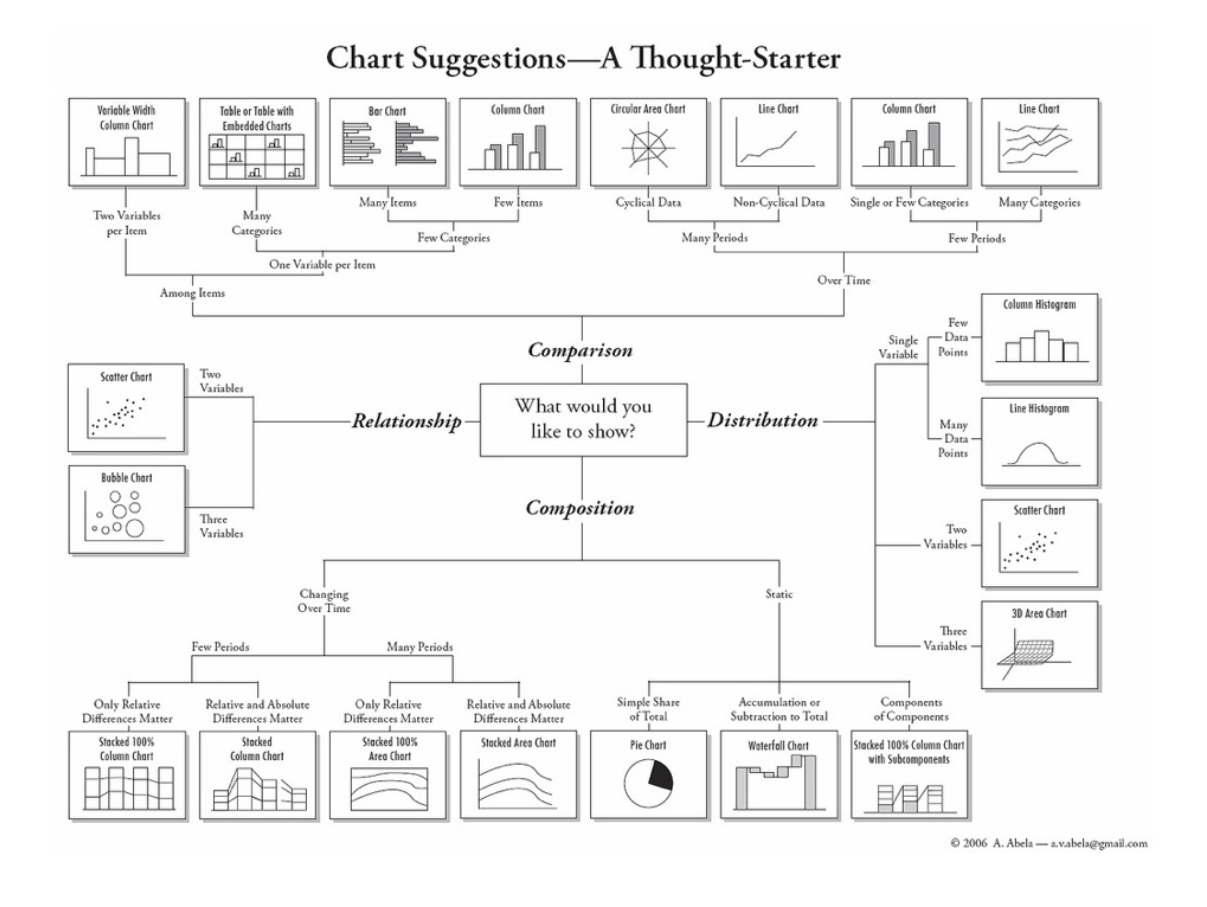

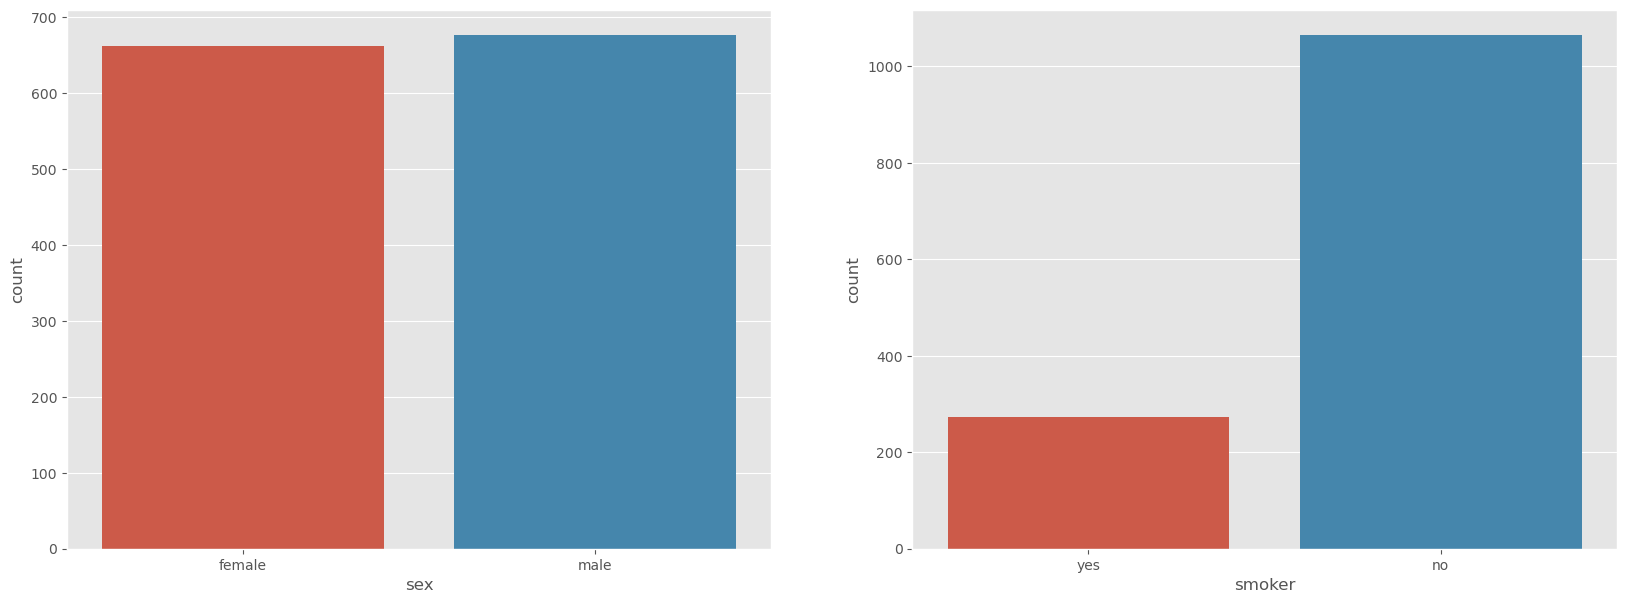

In [18]:
fig, ax = plt.subplots(nrows =1 , ncols =2, figsize=(20,7))
sns.countplot(x="sex", data=df, ax=ax[0])
sns.countplot(x="smoker", data=df, ax=ax[1])

plt.show()

/Users/minyoungxi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



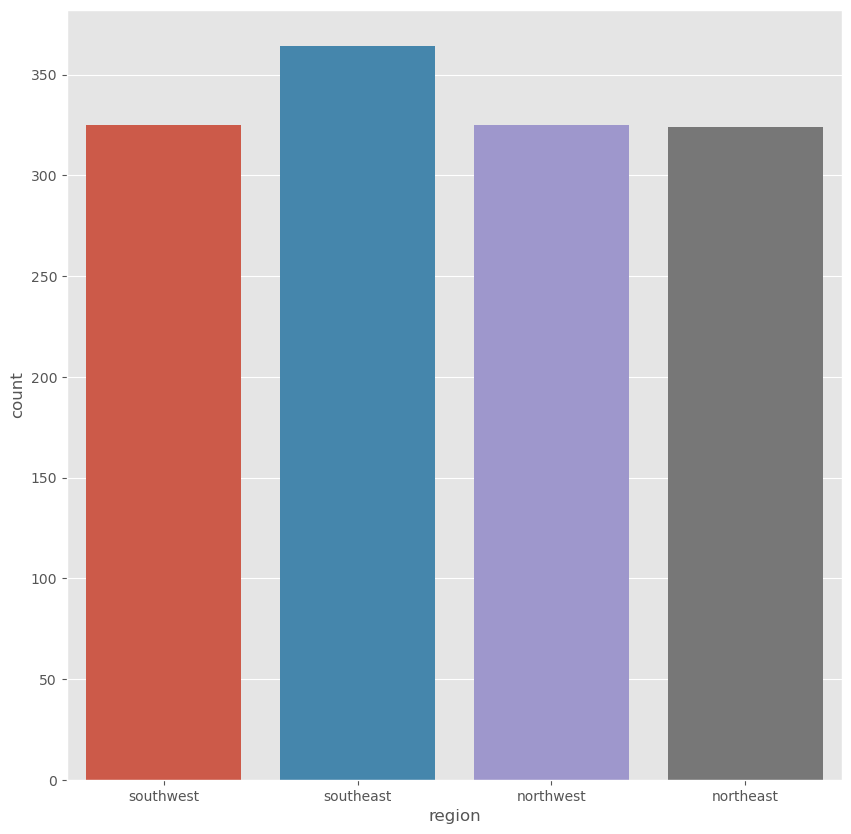

In [21]:
# 지역 확인 

plt.figure(figsize=(10,10))

sns.countplot(df["region"])
plt.show()

## Plotly 

In [25]:
# interactive Graph

px.scatter(df, x="age", y="charges",
          color="sex", animation_frame="smoker", size="children")

### Plotly 

* px.scatter 에서 animation_frame은 밑에 슬라이드바 

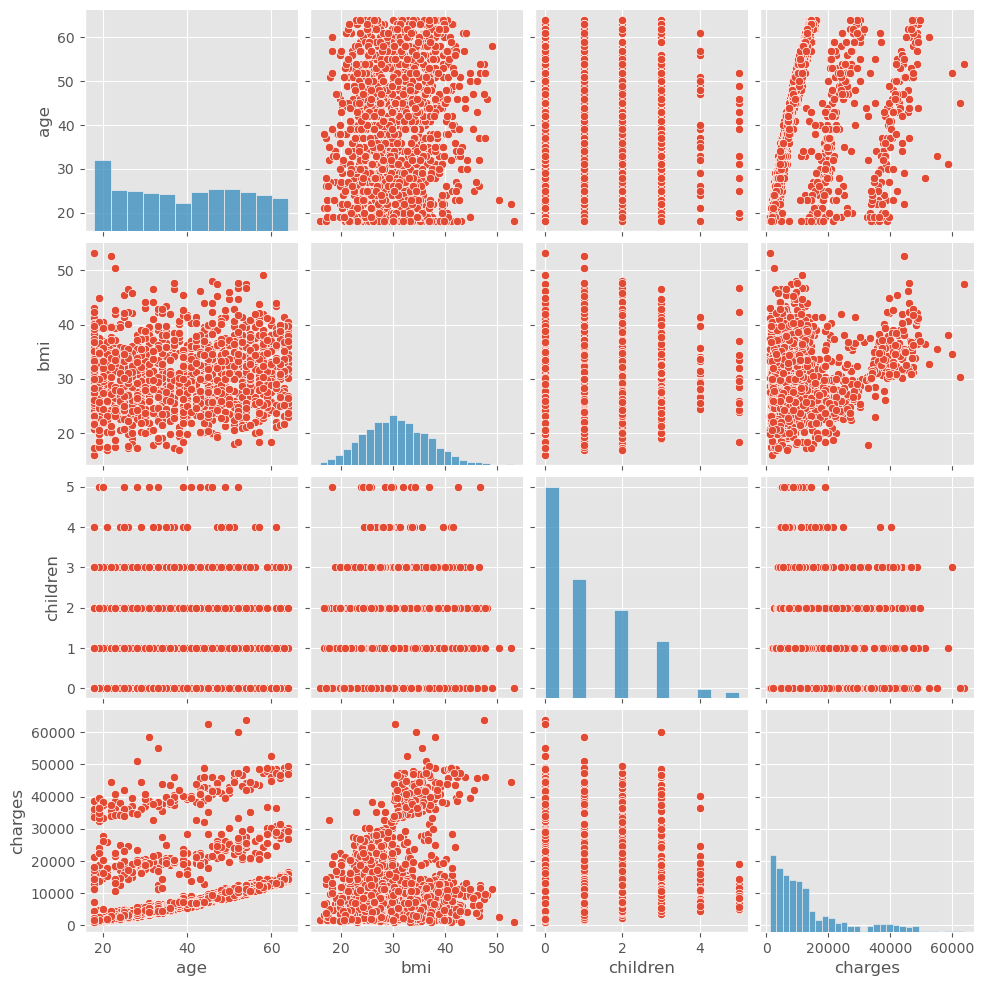

In [26]:
sns.pairplot

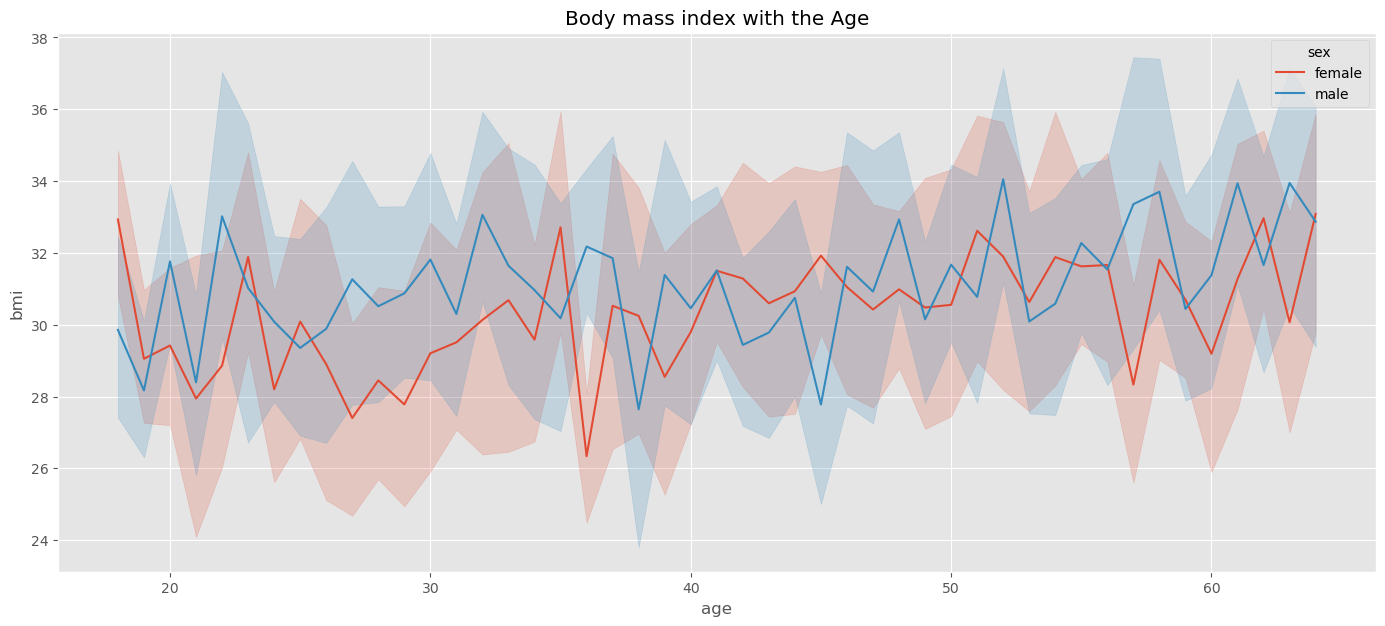

In [27]:
plt.figure(figsize=(17,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex")
plt.title("Body mass index with the Age")
plt.show()

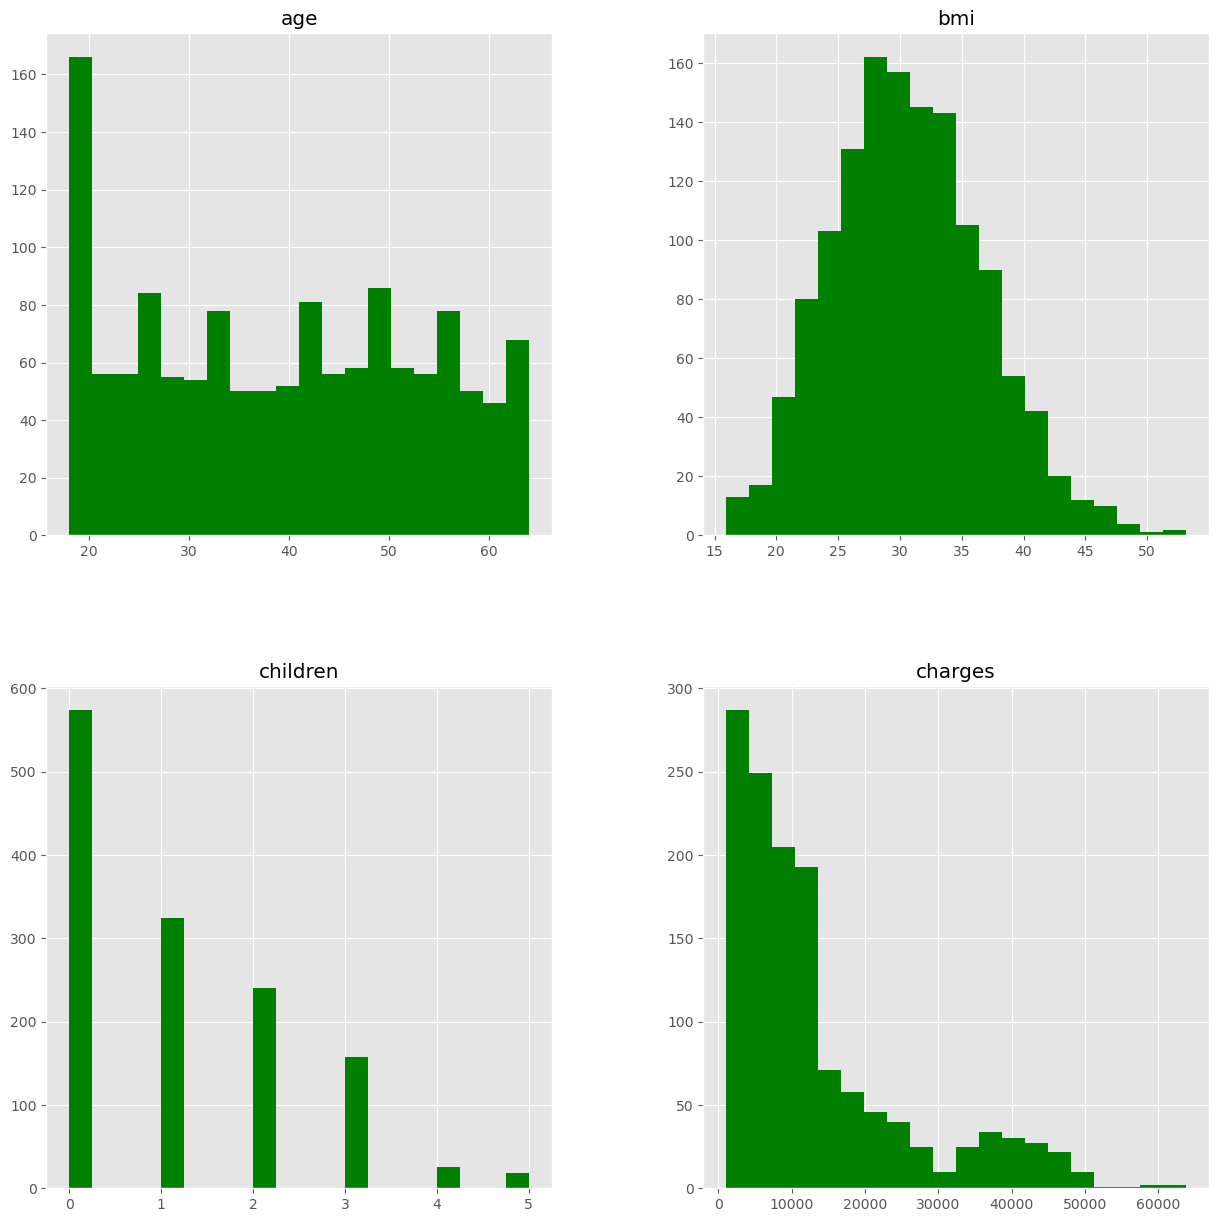

In [29]:
# Data Visualization with histogram 
df[['age',  'bmi', 'children', 'charges']].hist(bins=20, figsize=(15,15),color='green')
plt.show()

In [30]:
# group by 

reg = df.groupby("region")["charges"].mean().round(2)
reg

region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64

<AxesSubplot:xlabel='region'>

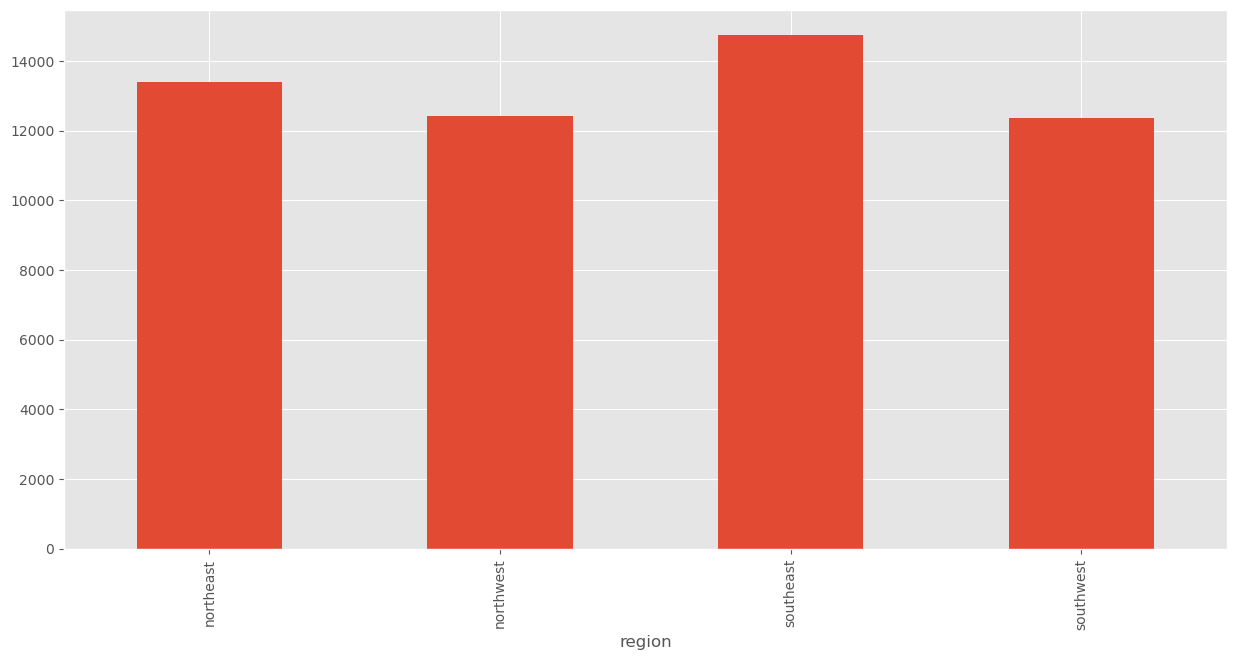

In [31]:
# Visualisation group by

reg.plot(kind="bar", figsize=(15,7))

In [32]:
# let making group by
a = df.groupby(["sex","smoker","region"])["charges"].mean().round(2)
a

sex     smoker  region   
female  no      northeast     9640.43
                northwest     8787.00
                southeast     8440.21
                southwest     8234.09
        yes     northeast    28032.05
                northwest    29670.82
                southeast    33034.82
                southwest    31687.99
male    no      northeast     8664.04
                northwest     8320.69
                southeast     7609.00
                southwest     7778.91
        yes     northeast    30926.25
                northwest    30713.18
                southeast    36029.84
                southwest    32598.86
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex,smoker,region'>

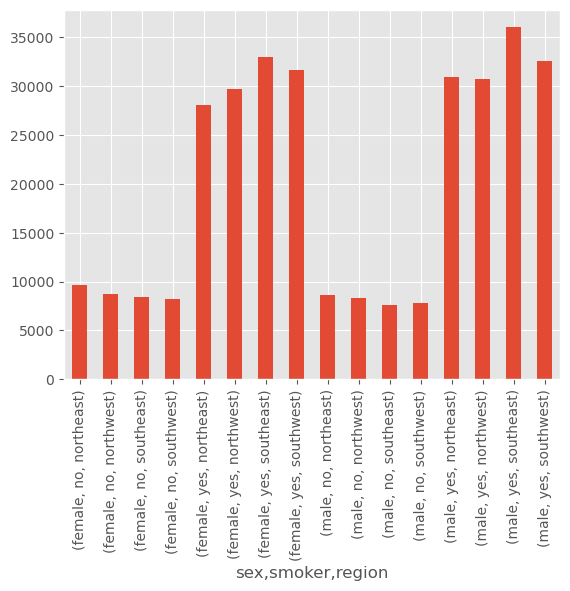

In [34]:
a.plot(kind="bar")

In [35]:
smo = df.groupby("smoker")["charges"].mean().round(2)
smo

smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64

<AxesSubplot:xlabel='smoker'>

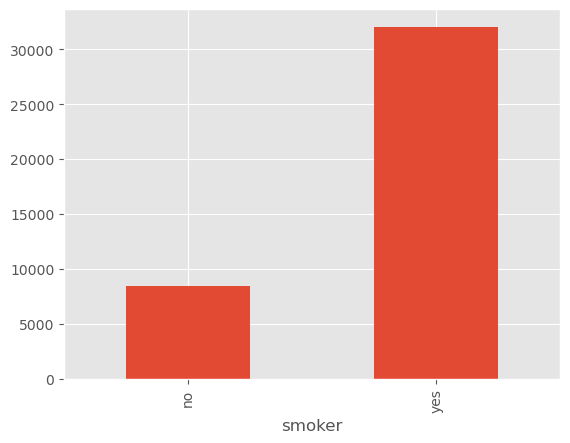

In [39]:
smo.plot(kind="bar")

In [41]:
gen = df.groupby("sex")["charges"].mean().round(2)
gen

sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex'>

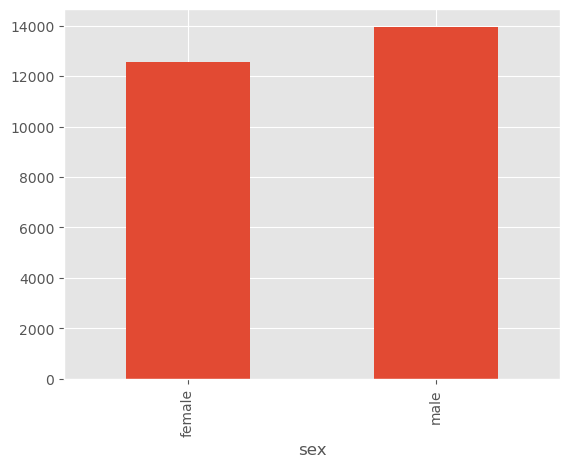

In [42]:
gen.plot(kind="bar")

## 데이터 분석 결과 

1. 나이가 높을수록 보험료가 높다
2. 비흡연자는 흡연자보다 보험료가 낮음
3. 성별에 따른 보혐료의 총량은 비슷함
4. 지역에 따른 보험료의 가치는 비슷함.

# 머신러닝 모델 빌딩

In [43]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### categorical 변수인 sex, smoker, region 들을 수치형으로 변환시킵니다. ( -> dummies )

In [46]:
df["Gender"] = pd.get_dummies(df["sex"], drop_first=True)
df["Smoker"] = pd.get_dummies(df["smoker"], drop_first=True)

##### region은 LabelEncoder로 변환 

In [47]:
LE = LabelEncoder()
LE.fit(df['region'])
df['Region'] = LE.transform(df['region'])

In [51]:
df['Region'].value_counts()

2    364
3    325
1    325
0    324
Name: Region, dtype: int64

In [52]:
df.drop(columns=['sex','smoker','region'], inplace=True)
df.head()

,age,bmi,children,charges,Gender,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


## pandas.get_dummies() VS sklearn.LabelEncoder

* get_dummies()는 0 또는 1의 값이 반환
* LabelEncoder는 클래스의 수에 따라 반환하는 값이 다름 0~k

In [54]:
#Defined X value and y value , and split the data train

X = df.drop(columns="charges")           
y = df["charges"]    # y = quality

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("y Train : ", y_train.shape)
print("y test : ", y_train.shape)

X Train :  (1070, 6)
X Test :  (268, 6)
y Train :  (1070,)
y test :  (1070,)


#### Linear Model

In [57]:
LinearRegression_model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

# fit model 

LinearRegression_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LinearRegression_model.predict(X_test)

# Model Evaluation
print("Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR))

/Users/minyoungxi/.local/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



Score the X-train with Y-train is :  0.7417049283233981
Score the X-test  with Y-test  is :  0.7833463107364539
Model Evaluation Linear R : mean absolute error is  4186.508898366435
 Model Evaluation Linear R : mean squared  error is  33635210.431178406
 Model Evaluation Linear R : median absolute error is  2685.2182160289076
 The Score Linear Regression  0.7833463107364539


#### K Neighbors Regressor Model

## KNN 알고리즘 파라미터 

* n_neighbors -> default=5, 가장 가까운 이웃을 몇개 고를지에 대한 parameter
* algorithm -> 예측에서 사용할 가중치 함수
    * auto - default값. 메서드에 맞게 전달된 값을 기반으로 가장 적합한 알고리즘을 결정하려고 시도합니다. 
    * ball_tree - ball tree를 사용
    * kd_tree - KDTree 를 사용
    * brute - 브루트 포스 알고리즘 사용
    
* p -> 
     * p=1 인 경우 이것은 맨하탄 거리(L1)를 사용하는 것과 동일하다.
     * p=2 인 경우 유클리안 거리 (L2) 사용. default
     
* n_jobs -> 사용할 코어의 갯수 

In [58]:
# using the K Neighbors Regressor Model

KNeighborsRegressor_model=KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

# fit model

KNeighborsRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", KNeighborsRegressor_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", KNeighborsRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predKN=KNeighborsRegressor_model.predict(X_test)

# Model Evaluation

print(" The Score K Neighbors Regressor Model " ,r2_score(y_test,y_predKN))

Score the X-train with Y-train is :  0.39376796951019544
Score the X-test  with Y-test  is :  0.15310172630898444
 The Score K Neighbors Regressor Model  0.15310172630898444
